In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation


In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key,path in zip(data_name_list, dataset_list)}

In [3]:
order = data['order_items'].groupby('order_id')['price'].sum().to_frame().reset_index()
order.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


## à ajouter

In [4]:
tmp = data['order_items'].groupby('order_id')[['price','freight_value']].sum().reset_index()
tmp.corr()

,price,freight_value
price,1.000000,0.412786
freight_value,0.412786,1.000000


## fin

In [5]:
order_2 = order.merge(
    data['orders'], on ='order_id', how='left')[
    ['order_id',
     'price',
     'customer_id',
     'order_delivered_customer_date',
       ]]

# Prix = prix + fret

In [6]:
data['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [7]:
data['order_items']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [8]:
order_3 = order_2.merge(data['customers'][['customer_id','customer_unique_id']],on='customer_id',how='left')
order_3.head()

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5


In [9]:
review_2 =  data['order_reviews'].groupby('order_id')['review_score'].mean().to_frame().reset_index()
review_2.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [10]:
order_4 = order_3.merge(review_2,on='order_id', how='left')
order_4.head()

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,5.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,4.0
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,5.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,5.0


# RFM

In [11]:
order_4['order_delivered_customer_date'] = pd.to_datetime(order_4['order_delivered_customer_date']).astype('datetime64[D]')

order_4['nb_days'] = (datetime.now() - order_4['order_delivered_customer_date']).astype('timedelta64[D]')

order_4 = order_4.dropna()

In [12]:
order_4

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score,nb_days
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,2017-09-20,871766c5855e863f6eccc05f988b23cb,5.0,2058.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12,eb28e67c4c0b83846050ddfb8a35d051,4.0,2189.0
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22,3818d81c6709e39d06b2738a8d3a2474,5.0,1934.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14,af861d436cfc08b2c2ddefd0ba074622,4.0,1730.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01,64b576fb70d441e8f1b2d7d446e483c5,5.0,2261.0
...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,b51593916b4b8e0d6f66f2ae24f2673d,2018-05-10,0c9aeda10a71f369396d0c04dce13a64,5.0,1826.0
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,84c5d4fbaf120aae381fad077416eaa0,2018-07-23,0da9fe112eae0c74d3ba1fe16de0988b,5.0,1752.0
98663,fffce4705a9662cd70adb13d4a31832d,99.90,29309aa813182aaddc9b259e31b870e6,2017-10-28,cd79b407828f02fdbba457111c38e4c4,5.0,2020.0
98664,fffe18544ffabc95dfada21779c9644f,55.99,b5e6afd5a41800fdf401e0272ca74655,2017-08-16,eb803377c9315b564bdedad672039306,5.0,2093.0


In [13]:
order_4.isna().mean()

order_id                         0.0
price                            0.0
customer_id                      0.0
order_delivered_customer_date    0.0
customer_unique_id               0.0
review_score                     0.0
nb_days                          0.0
dtype: float64

In [14]:
# rfm = order_4.groupby('customer_unique_id').agg({'nb_days' : np.min, 
#                                       'order_delivered_customer_date' : len,
#                                       'price' : np.sum,
#                                       'review_score'  : np.mean    
#                                      }).reset_index()

# rfm = rfm.rename(columns={'nb_days' : 'r', # récence
#             'order_delivered_customer_date' : 'f', # fréquence
#             'price' : 'm' }) # montant
# rfm

In [15]:
# rfm.isna().mean()

In [16]:
# rfm = rfm.dropna()

In [17]:
# imputation_mode = rfm.mode()
# rfm = rfm.fillna(imputation_mode)

In [18]:
# rfm.isna().mean()

In [19]:
# # Score par quantile
# rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')

# rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')

# rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2'])#.astype('str')

# #rfm =  rfm.dropna()

# rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')

# # rfm['rq'] = rfm['rq'].astype('str')
# # rfm['fq'] = rfm['fq'].astype('str')
# # rfm['mq'] = rfm['mq'].astype('str')


# rfm['log_r'] = np.log(rfm.r)
# rfm['log_f'] = np.log(rfm.f)
# rfm['log_m'] = np.log(rfm.m)


# # Score composite
# rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']

# rfm

In [20]:
# rfm.describe()

# Fonction RFM

In [21]:
def fonction_rfm (data):
    
    rfm = data.groupby('customer_unique_id').agg({'nb_days' : np.min, # minimum soit le dernier achat 
                                      'order_delivered_customer_date' : len, # fréquence
                                      'price' : np.sum, # Somme des montants des achats
                                      'review_score'  : np.mean    # Moyenne des notes clients
                                     }).reset_index()

    rfm = rfm.rename(columns={'nb_days' : 'r', # récence
            'order_delivered_customer_date' : 'f', # fréquence
            'price' : 'm' }) # montant
    
    rfm = rfm.dropna() # Suppression des NA
    
    # Score par quantile
#     rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')

#     rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')

#     rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2'])#.astype('str')

    # Format string pour les sommer 

#     rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')

    # rfm['rq'] = rfm['rq'].astype('str')
    # rfm['fq'] = rfm['fq'].astype('str')
    # rfm['mq'] = rfm['mq'].astype('str')

    # Passage en log 
    rfm['log_r'] = np.log(rfm.r)
    rfm['log_f'] = np.log(rfm.f)
    rfm['log_m'] = np.log(rfm.m)


    # Score composite
#     rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']
    
    
    return rfm
    

In [22]:
# Test fonction rfm
rfm = fonction_rfm(order_4)
rfm

,customer_unique_id,r,f,m,review_score,log_r,log_f,log_m
0,0000366f3b9a7992bf8c76cfdf3221e2,1820.0,1,129.90,5.0,7.506592,0.0,4.866765
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1826.0,1,18.90,4.0,7.509883,0.0,2.939162
2,0000f46a3911fa3c0805444483337064,2226.0,1,69.00,3.0,7.707962,0.0,4.234107
3,0000f6ccb0745a6a4b88665a16c9f078,2016.0,1,25.99,4.0,7.608871,0.0,3.257712
4,0004aac84e0df4da2b147fca70cf8255,1990.0,1,180.00,5.0,7.595890,0.0,5.192957
...,...,...,...,...,...,...,...,...
92748,fffcf5a5ff07b0908bd4e2dbc735a684,2134.0,1,1570.00,5.0,7.665753,0.0,7.358831
92749,fffea47cd6d3cc0a88bd621562a9d061,1947.0,1,64.89,4.0,7.574045,0.0,4.172694
92750,ffff371b4d645b6ecea244b27531430a,2268.0,1,89.90,5.0,7.726654,0.0,4.498698
92751,ffff5962728ec6157033ef9805bacc48,1822.0,1,115.00,5.0,7.507690,0.0,4.744932


# Fonction K means

In [23]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.metrics.cluster import adjusted_rand_score

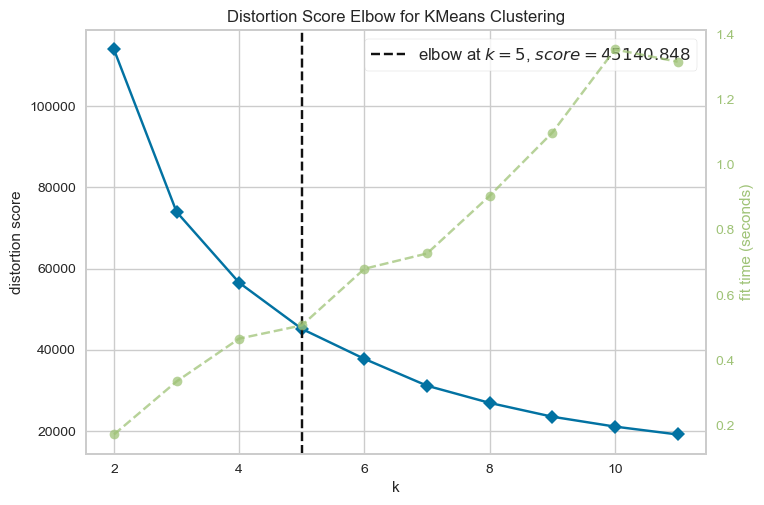

In [24]:
# Instantiate the clustering model and visualizer
model = KMeans()

X = np.array(rfm[['log_r','log_f','log_m','review_score']])

visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

In [25]:
def cluster_kmeans(rfm = rfm , k=5):
    
    # Features : la version log rfm
    X = np.array(rfm[['log_r','log_f','log_m','review_score']])
    
    # Model Kmeans défaut k = 5 
    model = KMeans(n_clusters = k, random_state=1990).fit(X)
    y_pred = model.predict(X)
    
    return y_pred 

In [26]:
y_pred  = cluster_kmeans(rfm,5)

In [27]:
rfm['cluster'] = y_pred

In [28]:
rfm['cluster'].value_counts()

0    29539
1    21092
3    18944
2    11771
4    11407
Name: cluster, dtype: int64

# ARI

In [29]:
pd.date_range(start='2/2/2019', end='2/08/2020', freq = "M")


DatetimeIndex(['2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
df = order_4.copy()

df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'] )

In [31]:
print('Date de début : ',df['order_delivered_customer_date'].min()) 
print('Date de fin : ',df['order_delivered_customer_date'].max()) 

Date de début :  2016-10-11 00:00:00
Date de fin :  2018-10-17 00:00:00


## Baseline 
    1ère année comme référence 
    Teste ARI sur différentes périodes (mois) sur la deuxième année 

In [72]:
# 1ere année
start_date = pd.to_datetime('10/11/2016') # M J Y
end_date = pd.to_datetime('10/11/2017')

# Dernière date dans nos données 
final_date = pd.to_datetime('10/17/2018')


baseline = df.loc[(df['order_delivered_customer_date'] > start_date) &
                  (df['order_delivered_customer_date'] < end_date)].copy()

baseline.shape

(26037, 7)

### Test 1 semaine
    Baseline prédict ==> s1

In [55]:
pd.date_range(start=end_date, freq = "W", periods = 1)[0]

Timestamp('2018-01-07 00:00:00', freq='W-SUN')

In [56]:
t1 = pd.to_datetime('10/18/2017')

s1 = df.loc[(df['order_delivered_customer_date'] > end_date) &
       (df['order_delivered_customer_date'] < t1)]

test = df.loc[
       (df['order_delivered_customer_date'] < t1)]

#s1

In [57]:
df.shape

(95830, 7)

In [73]:
rfm_baseline = fonction_rfm(baseline)
#rfm_s1 = fonction_rfm(s1)
rfm_test = fonction_rfm(test)

#rfm_baseline.merge(rfm_s1)
#rfm['cluster'] = cluster_kmeans(rfm_baseline)
#rfm_baseline

In [37]:
test.shape,baseline.shape,s1.shape

((26951, 7), (74885, 7), (0, 7))

In [38]:
cluster_kmeans(rfm_baseline)

array([3, 0, 1, ..., 3, 3, 3])

In [39]:
s1.shape

(0, 7)

In [40]:
#cluster_kmeans_predict(rfm,rfm_s1)

rfm_baseline = fonction_rfm(baseline)
#rfm_s1 = fonction_rfm(s1)
rfm_test = fonction_rfm(test)

In [74]:

def cluster_kmeans_predict(rfm = rfm_baseline ,s1 = rfm_test , k=5):
    
    # Features : la version log rfm + review
    #features = ['log_r','log_f','log_m','review_score']
    
    features = ['r','f','m','review_score']
    
    X_baseline = np.array(rfm[features]) # t0
    
    X_test = np.array(s1[features]) # t+1
    
    
    # Model Kmeans défaut k = 5 
    
    # 1. On entraine la baseline 
    model = KMeans(n_clusters = k, random_state=1990).fit(X_baseline)
    

    # 2. Prédiction sur t+1
    pred_s1 = model.predict(X_test)
    
    # 3. fit & prediction sur t+1
    
    model2 = KMeans(n_clusters = k, random_state=1990).fit(X_test)
    
    pred_test = model2.predict(X_test)
    
    
    
    print(adjusted_rand_score(pred_test, pred_s1))
    
    result = (adjusted_rand_score(pred_s1, pred_test))
    
    return result

In [44]:
# pred_test,pred_s1

In [75]:
cluster_kmeans_predict(rfm_baseline,rfm_test)

0.23564542508532738


0.23564542508532738

### Test mois

In [63]:
final_date, end_date

(Timestamp('2018-10-17 00:00:00'), Timestamp('2018-01-01 00:00:00'))

In [64]:
pd.date_range(start=end_date, freq = "M", end = final_date)

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', freq='M')

In [76]:
futur_mois = pd.date_range(start=end_date, freq = "15D", end = final_date)
futur_mois

DatetimeIndex(['2017-10-11', '2017-11-10', '2017-12-10', '2018-01-09',
               '2018-02-08', '2018-03-10', '2018-04-09', '2018-05-09',
               '2018-06-08', '2018-07-08', '2018-08-07', '2018-09-06',
               '2018-10-06'],
              dtype='datetime64[ns]', freq='30D')

In [77]:
res = []

for t in futur_mois:

    testing = df.loc[(df['order_delivered_customer_date'] < t)]
    
    # fonction rfm
    
    rfm_testing = fonction_rfm(testing)
        
    res.append(cluster_kmeans_predict(rfm_baseline,rfm_testing,k=5))
    
    print(rfm_baseline.shape,rfm_testing.shape)
    


0.9973836210571083
(25305, 8) (25307, 8)
0.7510303992732267
(25305, 8) (29447, 8)
0.6408243740802853
(25305, 8) (34836, 8)
0.5254812398012533
(25305, 8) (40985, 8)
0.47195525254021065
(25305, 8) (47488, 8)
0.47170032695604164
(25305, 8) (53602, 8)
0.4472333334695377
(25305, 8) (60082, 8)
0.4515629245730196
(25305, 8) (67692, 8)
0.40687588460441654
(25305, 8) (74116, 8)
0.39917651075802907
(25305, 8) (80434, 8)
0.4007180409098189
(25305, 8) (85956, 8)
0.23168666490824685
(25305, 8) (92726, 8)
0.23172193621367368
(25305, 8) (92751, 8)


[]

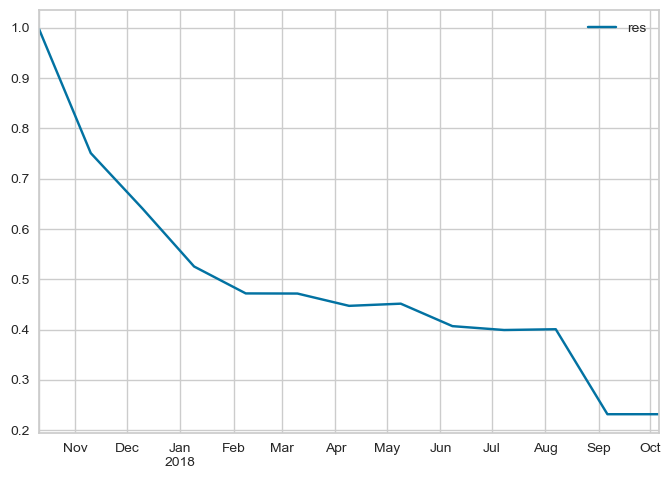

In [78]:
pd.DataFrame({'res' : res }, index = futur_mois).plot()
plt.plot()

In [79]:
futur_mois = pd.date_range(start=end_date, freq = "15D", end = final_date)
futur_mois


res = []

for t in futur_mois:

    testing = df.loc[(df['order_delivered_customer_date'] < t)]
    
    # fonction rfm
    
    rfm_testing = fonction_rfm(testing)
        
    res.append(cluster_kmeans_predict(rfm_baseline,rfm_testing,k=5))
    
    print(rfm_baseline.shape,rfm_testing.shape)
    


0.9973836210571083
(25305, 8) (25307, 8)
0.8129239743211479
(25305, 8) (27470, 8)
0.7510303992732267
(25305, 8) (29447, 8)
0.6995154524462192
(25305, 8) (31591, 8)
0.6408243740802853
(25305, 8) (34836, 8)
0.5671615092960274
(25305, 8) (38418, 8)
0.5254812398012533
(25305, 8) (40985, 8)
0.5132905318984112
(25305, 8) (44099, 8)
0.47195525254021065
(25305, 8) (47488, 8)
0.46156479243001153
(25305, 8) (50330, 8)
0.47170032695604164
(25305, 8) (53602, 8)
0.47470310138204586
(25305, 8) (56722, 8)
0.4472333334695377
(25305, 8) (60082, 8)
0.4554401423493638
(25305, 8) (63926, 8)
0.4515629245730196
(25305, 8) (67692, 8)
0.41768219959422287
(25305, 8) (71855, 8)
0.40687588460441654
(25305, 8) (74116, 8)
0.39875137046071535
(25305, 8) (77522, 8)
0.39917651075802907
(25305, 8) (80434, 8)
0.4042760897446569
(25305, 8) (82228, 8)
0.4007180409098189
(25305, 8) (85956, 8)
0.366048845465795
(25305, 8) (90023, 8)
0.23168666490824685
(25305, 8) (92726, 8)
0.2241354764882599
(25305, 8) (92746, 8)
0.231721

[]

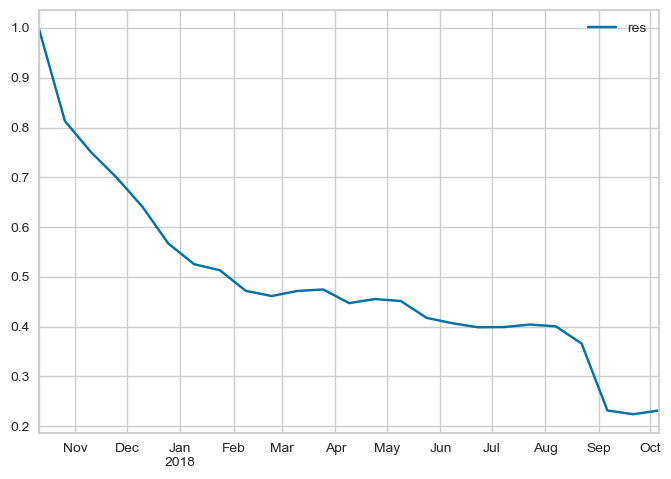

In [80]:
pd.DataFrame({'res' : res }, index = futur_mois).plot()
plt.plot()

# Dépot 

In [ ]:
# def fonction_finale(periode=futur_mois):
    
#     # On choisit la période
    
#     futur_mois = pd.date_range(start=end_date, freq = "M",periods = 12)
    
#     res = []
    
#         for t in futur_mois:

#             test = df.loc[(df['order_delivered_customer_date'] < t)]
    
#     # fonction rfm
    
#             rfm_test = fonction_rfm(test)
        
#         #res = []
        
#             res.append(cluster_kmeans_predict(rfm_baseline,rfm_test))
        
        
#     #data_res = pd.DataFrame( {'mois' : futur_mois,'ARI' : res})    
    
#     return res 

In [ ]:
# tt

In [ ]:
# tt = fonction_finale(futur_mois)

In [ ]:
# L = [2,3,4,5]
 
# R = []
# for v in L:
#     R.append(2**v)
# print(R)
# [4, 8, 16, 32]

In [ ]:
# k=5
# # Features : la version log rfm + review
# features = ['log_r','log_f','log_m','review_score']
    
# X_baseline = np.array(rfm_baseline[features]) # t0
    
# X_test = np.array(rfm_test[features]) # t+1
    
    
#     # Model Kmeans défaut k = 5 
    
#     # 1. On entraine la baseline 
# model = KMeans(n_clusters = k, random_state=1990).fit(X_baseline)
    

#     # 2. Prédiction sur t+1
# pred_s1 = model.predict(X_test)
    
#     # 3. fit & prediction sur t+1
    
# model2 = KMeans(n_clusters = k, random_state=1990).fit(X_test)
    
# pred_test = model2.predict(X_test)

In [ ]:
# def cluster_kmeans_predict(rfm = rfm ,s1 = rfm_s1, k=5):
    
#     # Features : la version log rfm
#     X = np.array(rfm[['log_r','log_f','log_m','review_score']])
    
#     # à prédire 
#     y = np.array(rfm_s1[['log_r','log_f','log_m','review_score']])
    
#     # Model Kmeans défaut k = 5 
#     model = KMeans(n_clusters = k, random_state=1990).fit(X)
    
#     y_pred = model.predict(X)
#     y_pred_s1 = model.fit_predict(y)
    
#     print(adjusted_rand_score(y_pred, y_pred_s1))
    
#     return y_pred , y_pred_s1 , adjusted_rand_score(y_pred, y_pred_s1)